# Import Libraries

In [13]:
import pandas as pd # data manipulation and analysis
import numpy as np #support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import matplotlib.pyplot as plt # its numerical mathematics extension NumPy
import sklearn #features various classification, regression and clustering algorithms including support-vector machines
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


# Import the dataset

In [14]:
df = pd.read_csv(r'..\dataset-01\framingham.csv')


# EDA

In [15]:
df.shape
print(df.shape)

(4238, 16)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [17]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [18]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [19]:
#returns the no of missing values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Correlation analysis

In [20]:
# To check how each feature is co-related with the target value
df.corrwith(df['TenYearCHD'])*100

male                 8.842757
age                 22.525610
education           -5.405896
currentSmoker        1.945627
cigsPerDay           5.788426
BPMeds               8.748858
prevalentStroke      6.180995
prevalentHyp        17.760273
diabetes             9.731651
totChol              8.218428
sysBP               21.642904
diaBP               14.529910
BMI                  7.519193
heartRate            2.291261
glucose             12.554400
TenYearCHD         100.000000
dtype: float64

In [21]:
import seaborn as sns

<Axes: >

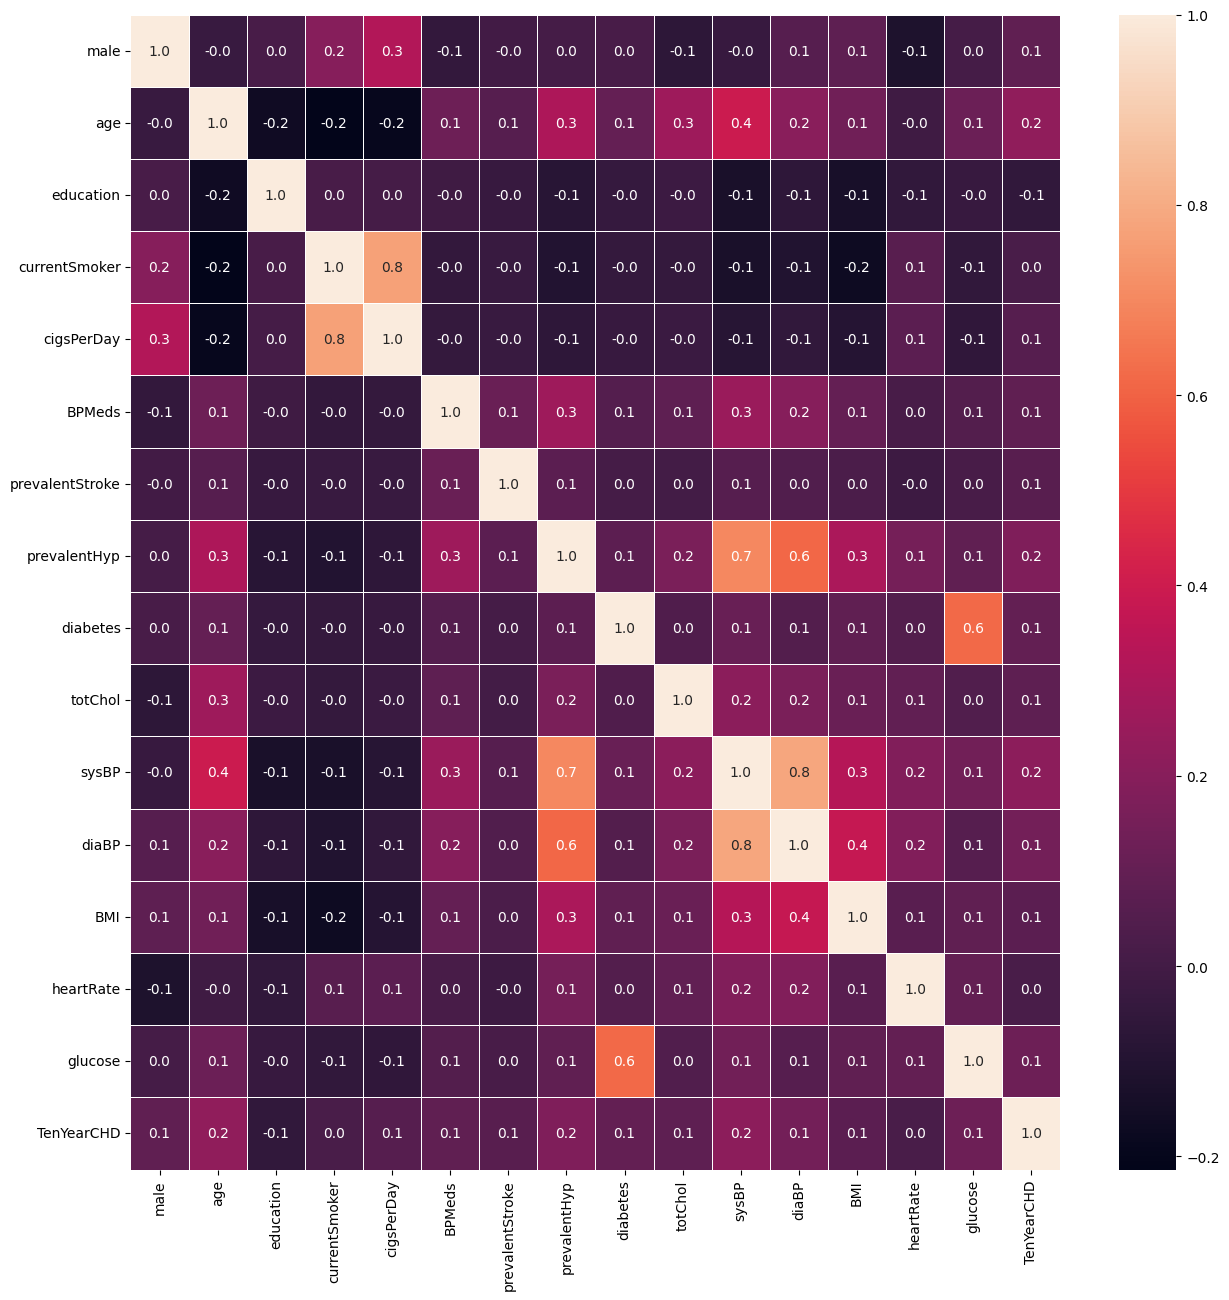

In [22]:
f,ax=plt.subplots(figsize=(15,15)) # f=figure and ax=axis creates a figure and axis object with a specified size (15x15 inches) using plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax) #uses sns.heatmap() to plot a heatmap of the correlation matrix of the DataFrame df
# df.corr(): Computes the correlation matrix of the DataFrame df.
# annot=True: Displays the correlation values on the heatmap.
# linewidths=.5: Sets the width of the lines between each cell in the heatmap.
# fmt='.1f': Formats the displayed correlation values to one decimal place.
# ax=ax: Specifies the axis object on which the heatmap will be plotted.

Since the correlation of education with all the other features is negative, we decide to exclude it from the dataset

In [23]:
#Dropping of the education column
del df['education']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [25]:
# removes any rows from the DataFrame df that contain missing values (NaN) along the axis 0, which corresponds to the rows
df.dropna(axis=0,inplace=True) # inplace-> changes are made directly to the original DataFrame without creating a new copy

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3749 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3749 non-null   int64  
 1   age              3749 non-null   int64  
 2   currentSmoker    3749 non-null   int64  
 3   cigsPerDay       3749 non-null   float64
 4   BPMeds           3749 non-null   float64
 5   prevalentStroke  3749 non-null   int64  
 6   prevalentHyp     3749 non-null   int64  
 7   diabetes         3749 non-null   int64  
 8   totChol          3749 non-null   float64
 9   sysBP            3749 non-null   float64
 10  diaBP            3749 non-null   float64
 11  BMI              3749 non-null   float64
 12  heartRate        3749 non-null   float64
 13  glucose          3749 non-null   float64
 14  TenYearCHD       3749 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.6 KB


# Feature selection

We are using the backward elimination method to select the important features here. Backward elimination technique involves finding the P values and eliminating those with P>=0.05

In [27]:
X= df.drop('TenYearCHD',axis = 1)
y = df['TenYearCHD']

In [28]:
print(X.shape, y.shape) # x-> feature matrix y->desired output

(3749, 14) (3749,)


In [29]:
X['intercept']=1

In [30]:
X

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,intercept
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,1
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,1
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,1
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,1
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,1


In [31]:
logit_model=sm.Logit(y,X) #logistic regression object
logit_result=logit_model.fit() #logit_result will contain the results of the logistic regression model, including the estimated coefficients, standard errors, p-values
#In this line, the logistic regression model is fitted to the data using the fit() method
#The fit() method estimates the model parameters using maximum likelihood estimation and returns a result object, logit_result, that contains various information about the fitted model.

Optimization terminated successfully.
         Current function value: 0.377199
         Iterations 7


In [32]:
print(logit_result.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3734
Method:                           MLE   Df Model:                           14
Date:                Mon, 12 Jun 2023   Pseudo R-squ.:                  0.1169
Time:                        00:04:25   Log-Likelihood:                -1414.1
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.922e-71
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.5740      0.107      5.343      0.000       0.363       0.785
age                 0.0640      0.007      9.787      0.000       0.051       0.077
currentSmoker       0.0732      

In [33]:
x=X.drop(['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','diaBP','BMI','heartRate','intercept'],axis=1)

In [34]:
x

,male,age,cigsPerDay,totChol,sysBP,glucose
0,1,39,0.0,195.0,106.0,77.0
1,0,46,0.0,250.0,121.0,76.0
2,1,48,20.0,245.0,127.5,70.0
3,0,61,30.0,225.0,150.0,103.0
4,0,46,23.0,285.0,130.0,85.0
...,...,...,...,...,...,...
4231,1,58,0.0,187.0,141.0,81.0
4232,1,68,0.0,176.0,168.0,79.0
4233,1,50,1.0,313.0,179.0,86.0
4234,1,51,43.0,207.0,126.5,68.0


In [35]:
x['intercept']=1

In [36]:
x

,male,age,cigsPerDay,totChol,sysBP,glucose,intercept
0,1,39,0.0,195.0,106.0,77.0,1
1,0,46,0.0,250.0,121.0,76.0,1
2,1,48,20.0,245.0,127.5,70.0,1
3,0,61,30.0,225.0,150.0,103.0,1
4,0,46,23.0,285.0,130.0,85.0,1
...,...,...,...,...,...,...,...
4231,1,58,0.0,187.0,141.0,81.0,1
4232,1,68,0.0,176.0,168.0,79.0,1
4233,1,50,1.0,313.0,179.0,86.0,1
4234,1,51,43.0,207.0,126.5,68.0,1


In [37]:
logit_model=sm.Logit(y,x)
logit_result=logit_model.fit()
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.378120
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3742
Method:                           MLE   Df Model:                            6
Date:                Mon, 12 Jun 2023   Pseudo R-squ.:                  0.1148
Time:                        00:04:25   Log-Likelihood:                -1417.6
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.548e-76
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
male           0.5813      0.105      5.521      0.000       0.375       0.788
age            0.0654      0.

# Splitting the dataset

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Training the model

In [39]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [40]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.848